<a href="https://colab.research.google.com/github/gawankarsanket/dswithchirag_assignments/blob/main/DecisionTree_Assignment_Hotel_Reservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


#For spliting data into train and test
from sklearn.model_selection import train_test_split


#For the decisiontree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report


#for pre processing
from sklearn import preprocessing

## READ CSV into PD and basic EDA

In [55]:
df=pd.read_csv('/content/Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [57]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [58]:
df.duplicated().sum()

0

In [59]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

## REMOVE Unwated columns which has no impact on target

In [60]:
df.drop(['Booking_ID','arrival_year', 'arrival_month', 'arrival_date'],axis=1,inplace=True)

df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled


#SPLIT into X and Y

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   market_segment_type                   36275 non-null  object 
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [64]:
x=df.iloc[:,:14]
y=df.iloc[:,14:]

In [65]:
x.shape,y.shape

((36275, 14), (36275, 1))

##ONE HOT ENCODING for Input features (X) with String type data

In [66]:
# Find Unique values

x['type_of_meal_plan'].value_counts(),x['room_type_reserved'].value_counts(),x['market_segment_type'].value_counts()

(Meal Plan 1     27835
 Not Selected     5130
 Meal Plan 2      3305
 Meal Plan 3         5
 Name: type_of_meal_plan, dtype: int64,
 Room_Type 1    28130
 Room_Type 4     6057
 Room_Type 6      966
 Room_Type 2      692
 Room_Type 5      265
 Room_Type 7      158
 Room_Type 3        7
 Name: room_type_reserved, dtype: int64,
 Online           23214
 Offline          10528
 Corporate         2017
 Complementary      391
 Aviation           125
 Name: market_segment_type, dtype: int64)

In [67]:
x = pd.get_dummies(x, columns=['type_of_meal_plan','room_type_reserved','market_segment_type'])

x.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,0,0,0,65.00,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,0,0,0,106.68,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,0,0,0,60.00,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,0,0,0,100.00,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,0,0,0,94.50,...,0,0,0,0,0,0,0,0,0,1


In [68]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   repeated_guest                        36275 non-null  int64  
 7   no_of_previous_cancellations          36275 non-null  int64  
 8   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 9   avg_price_per_room                    36275 non-null  float64
 10  no_of_special_requests                36275 non-null  int64  
 11  type_of_meal_pl

#Encoder for Target feature (Y)

In [69]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   booking_status  36275 non-null  object
dtypes: object(1)
memory usage: 283.5+ KB


In [70]:

label_encoder = preprocessing.LabelEncoder()
y['booking_status'] = label_encoder.fit_transform(df['booking_status'])

y['booking_status'].value_counts()



1    24390
0    11885
Name: booking_status, dtype: int64

## CREATE TRAIN and TEST

In [71]:
# x_train  & y_train
# x_test & y_test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# NOTE" Sequence of x_train x_test, y_train y_test is fixed.
#test_size 0.1  means test data 10%
# meaning training data 90%

In [72]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((29020, 27), (7255, 27), (29020, 1), (7255, 1))

## Building Decision Tree Classifier using Entropy as a Criterion

In [73]:
model=DecisionTreeClassifier(criterion='entropy',max_depth =4,random_state=2)

model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=2)

[Text(0.5431034482758621, 0.9, 'x[5] <= 151.5\nentropy = 0.911\nsamples = 29020\nvalue = [9469, 19551]'),
 Text(0.27586206896551724, 0.7, 'x[10] <= 0.5\nentropy = 0.779\nsamples = 23294\nvalue = [5367, 17927]'),
 Text(0.13793103448275862, 0.5, 'x[26] <= 0.5\nentropy = 0.916\nsamples = 12134\nvalue = [4023, 8111]'),
 Text(0.06896551724137931, 0.3, 'x[5] <= 90.5\nentropy = 0.593\nsamples = 6172\nvalue = [886, 5286]'),
 Text(0.034482758620689655, 0.1, 'entropy = 0.417\nsamples = 4790\nvalue = [404, 4386]'),
 Text(0.10344827586206896, 0.1, 'entropy = 0.933\nsamples = 1382\nvalue = [482, 900]'),
 Text(0.20689655172413793, 0.3, 'x[5] <= 13.5\nentropy = 0.998\nsamples = 5962\nvalue = [3137, 2825]'),
 Text(0.1724137931034483, 0.1, 'entropy = 0.785\nsamples = 1597\nvalue = [374, 1223]'),
 Text(0.2413793103448276, 0.1, 'entropy = 0.948\nsamples = 4365\nvalue = [2763, 1602]'),
 Text(0.41379310344827586, 0.5, 'x[10] <= 1.5\nentropy = 0.531\nsamples = 11160\nvalue = [1344, 9816]'),
 Text(0.34482758

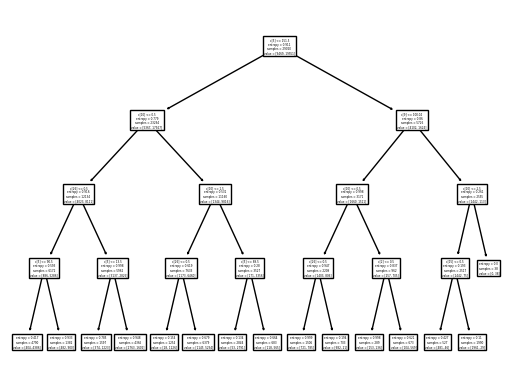

In [74]:
tree.plot_tree(model)

## Prediction on the Test data

In [75]:
preds = model.predict(x_test)

In [76]:
preds

array([1, 1, 1, ..., 1, 1, 1])

In [77]:
y_test

,booking_status
4968,1
34540,1
36108,1
1553,0
24974,1
...,...
35781,0
12257,1
27212,1
28097,1


##Crosstab : way to check 2d table values predicted vs actual

In [79]:
pd.crosstab(y_test['booking_status'],preds)

col_0,0,1
booking_status,,
0,1499,917
1,450,4389


In [83]:
np.mean(preds==y_test['booking_status'])

0.8115782219159201

In [80]:
#Add these y_test column and predicted coluns into x_test
x_test['y_testing']=y_test
x_test['Preds']=preds

In [81]:
x_test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,y_testing,Preds
4968,2,1,1,0,0,3,0,0,0,90.00,...,0,0,0,0,0,0,0,1,1,1
34540,2,0,1,2,0,9,0,0,0,48.67,...,0,0,0,0,0,0,1,0,1,1
36108,2,0,2,2,0,24,0,0,0,95.20,...,0,0,0,0,0,0,0,1,1,1
1553,2,0,0,3,0,23,0,0,0,127.67,...,0,0,0,0,0,0,0,1,0,0
24974,2,1,0,2,0,9,0,0,0,201.50,...,0,0,0,0,0,0,0,1,1,1
